In [1]:
import numpy as np
import os
import random
from matplotlib import pyplot as plt
import datetime
from scipy.optimize import curve_fit
import matplotlib.backends.backend_pdf

import seaborn as sns              #pretty plots
plt.style.use("seaborn")
sns.set()
plt.style.library["seaborn"]["figure.figsize"] = (10,  7)
plt.rcParams["patch.force_edgecolor"] = False

colours=sns.color_palette()



In [2]:
def gaussian (x, a, mu, sigma):
    return a*np.exp(-1*(x-mu)**2/(2*sigma**2))

def lin (x,a,b):
    return a*x + b

def lin_0 (x,a):
    return a*x

In [3]:
file_path = r"Data"
file_names = []
calname = 'Channel'
for i in range(2,7):
    for j in range(0,10,2):
        file_names.append(calname+'{}_{}GeV.txt'.format(j,i)) 

In [4]:
int(np.trunc(4/4))

1

1

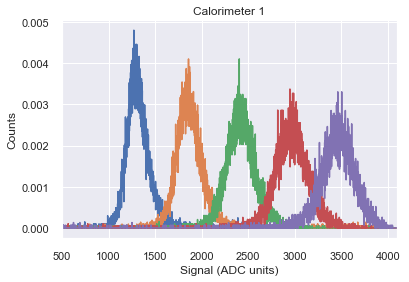

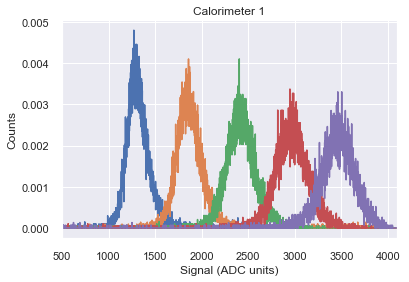

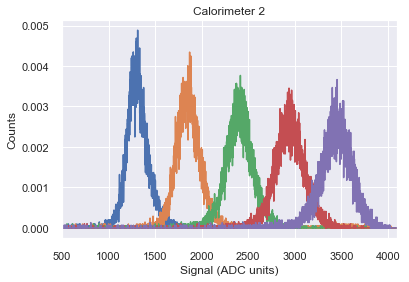

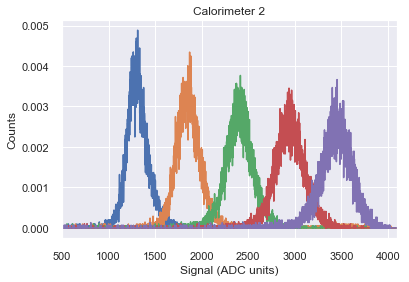

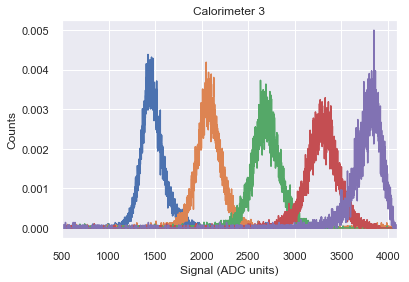

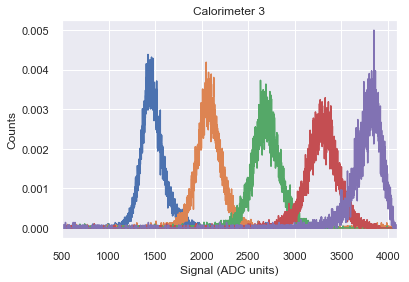

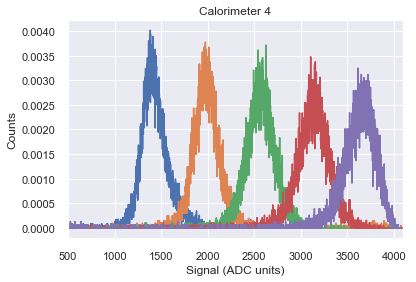

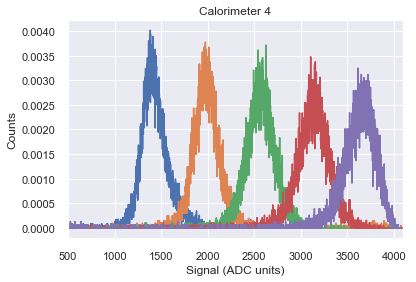

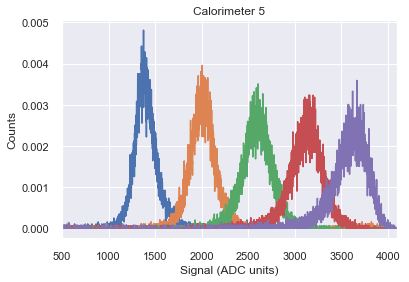

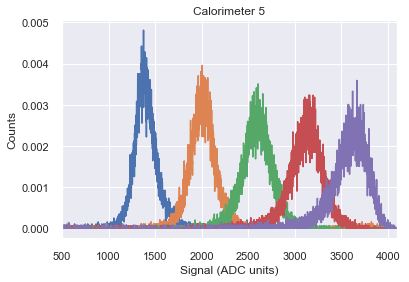

In [5]:
for i in [0,1,2,3,4]:
    j=2
    for file_name in file_names[i::5]:
    #for file_name in [file_names[0]]:
        plt.title('Calorimeter {}'.format(i+1))
        counts = np.genfromtxt(os.path.join(file_path,file_name), usecols =0, encoding='ANSI')[500:]
        counts = counts/np.sum(counts)
        bins = np.arange(500,4096)
        plt.plot(bins,counts)
        plt.xlabel('Signal (ADC units)')
        plt.ylabel('Counts')
        j = j+1   
        #plt.legend(loc='best')
    plt.xlim(500, 4095)
    plt.show()
    

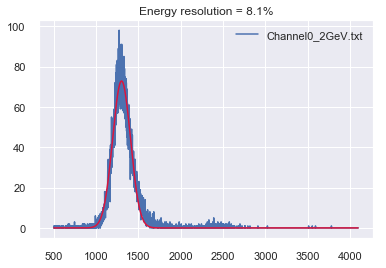

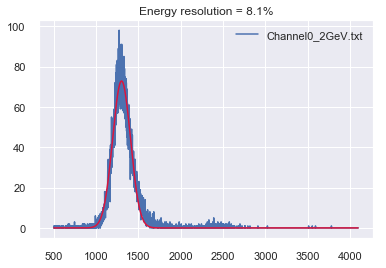

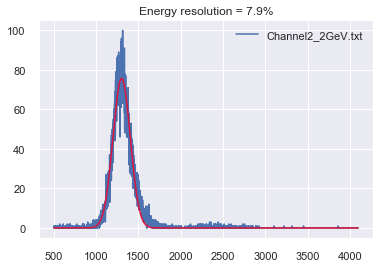

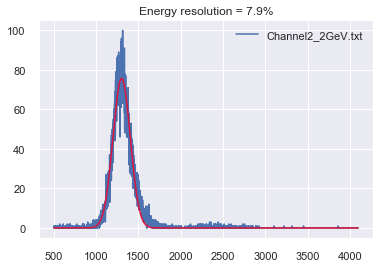

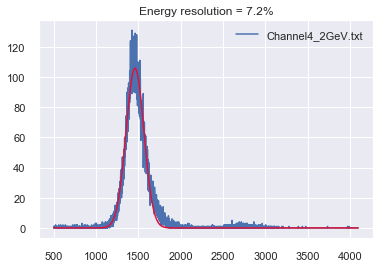

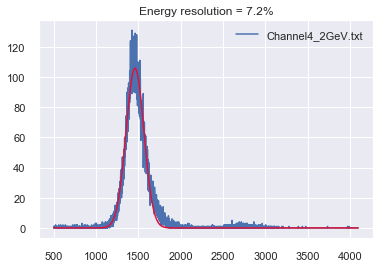

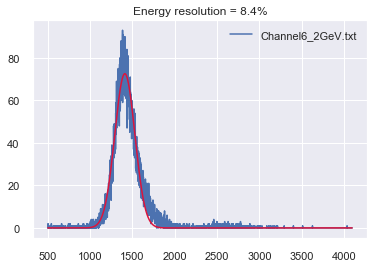

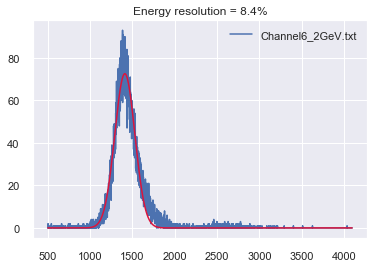

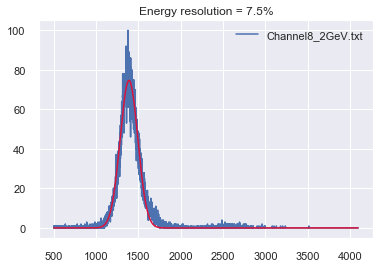

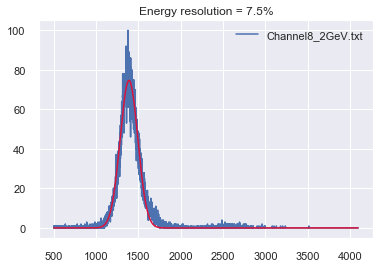

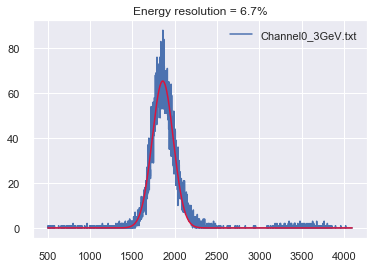

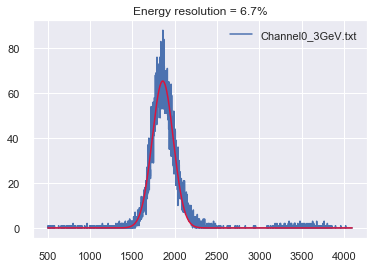

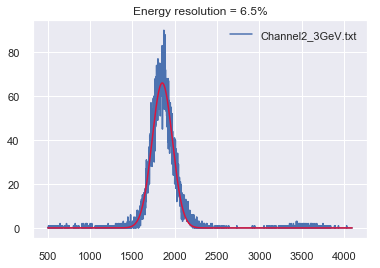

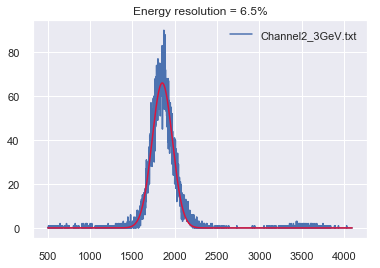

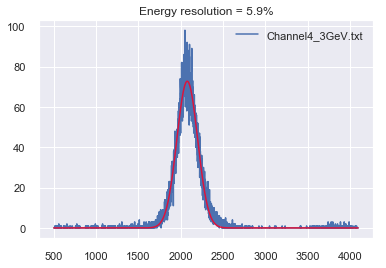

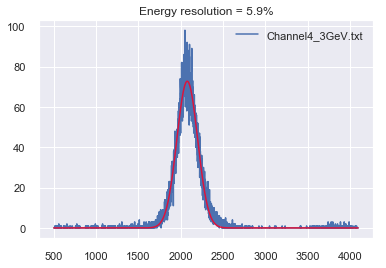

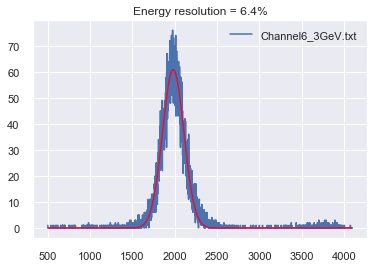

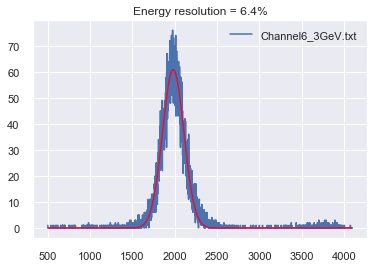

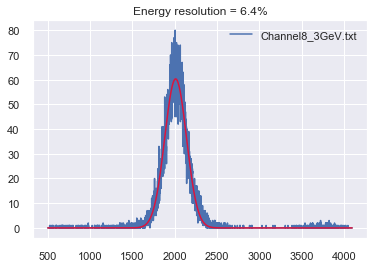

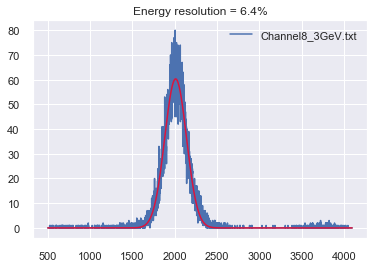

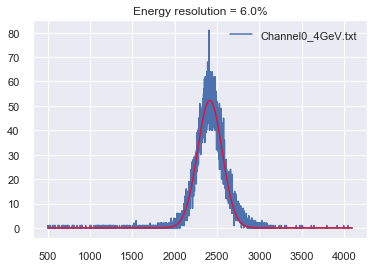

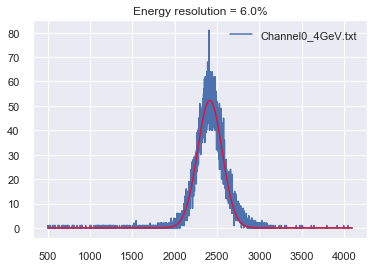

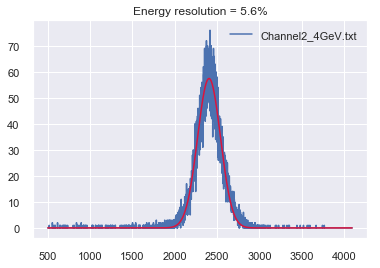

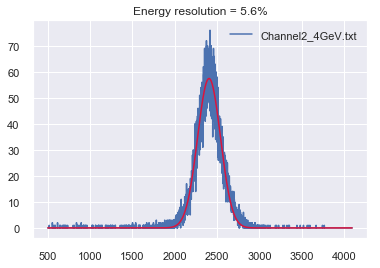

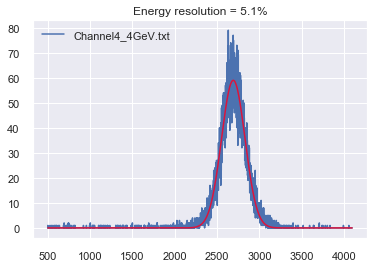

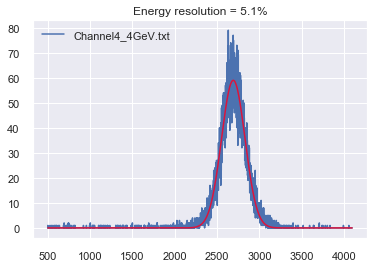

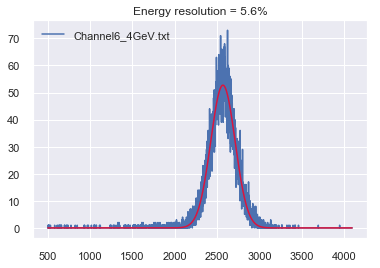

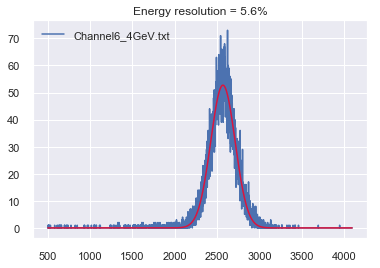

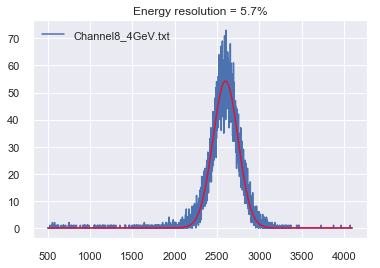

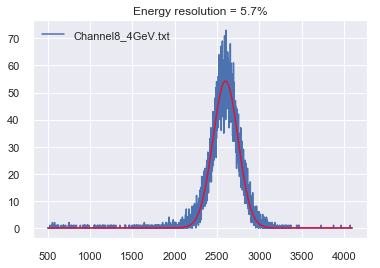

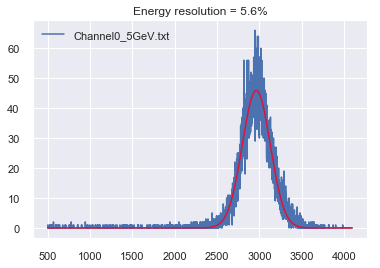

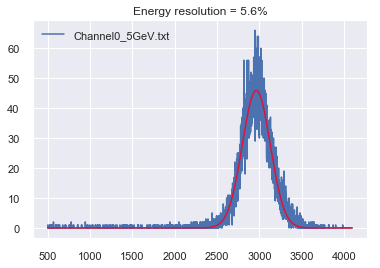

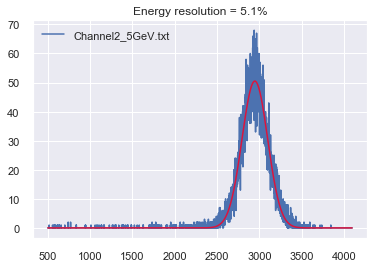

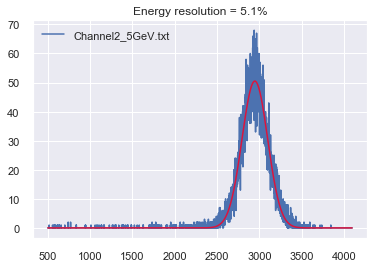

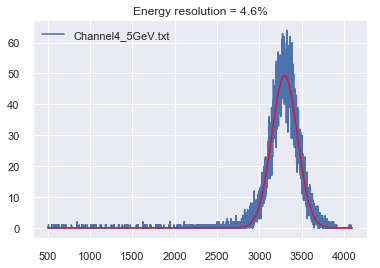

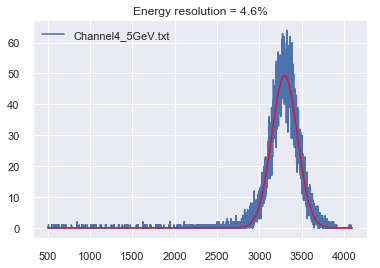

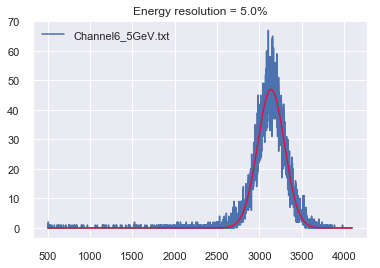

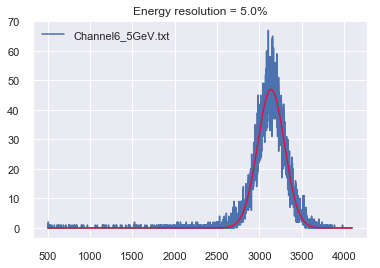

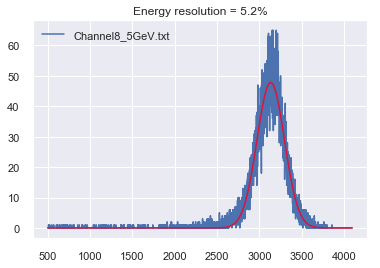

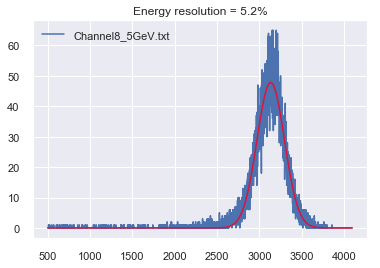

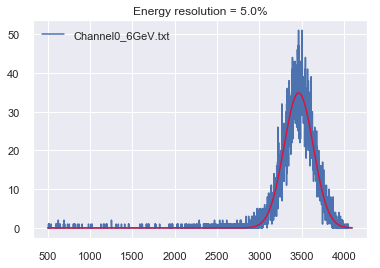

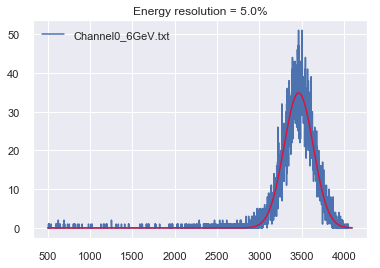

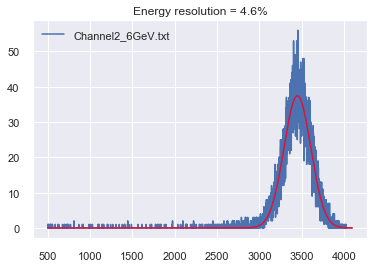

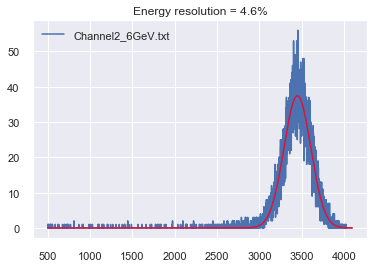

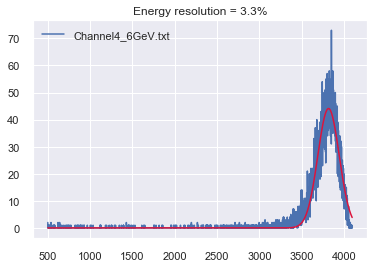

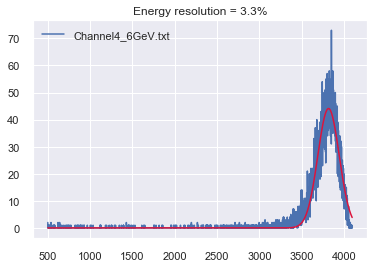

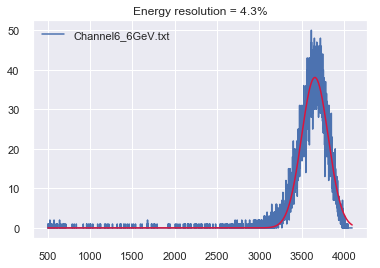

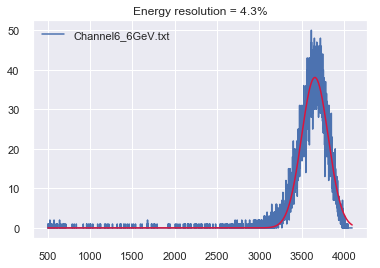

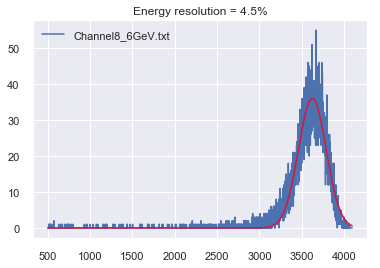

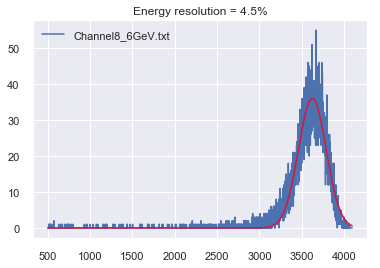

In [6]:
mu = {}
mu_err = {}

i=0
for file_name in file_names:
    
    counts = np.genfromtxt(os.path.join(file_path,file_name), usecols =0, encoding='ANSI')
    bins = np.arange(0,4096)
    y = counts[500:4096]
    x = bins[500:4096]
    
    plt.plot(x,y,label=file_name)
    max_index = np.where(y==max(y))[0][0]
    p0=(75,x[max_index], 130)
    
    popt,pcov = curve_fit(gaussian, x, y, p0, maxfev=20000)
    plt.title('Energy resolution = {:.1f}%'.format(100*popt[2]/popt[1]))
    plt.plot(x, gaussian(x,*popt), c='crimson')
    plt.legend(loc='best')
    plt.show()
    
    mu[file_name] = popt[1]
    mu_err[file_name] = popt[2]
    i+=1
    

Calorimeter  1 @ 1300 V
Slope = 543.0
Offset = 227.4
_______________
Calorimeter  2 @ 1475 V
Slope = 538.8
Offset = 235.0
_______________
Calorimeter  3 @ 1215 V
Slope = 593.4
Offset = 294.0
_______________
Calorimeter  4 @ 1300 V
Slope = 564.5
Offset = 292.3
_______________
Calorimeter  5 @ 1435 V
Slope = 559.6
Offset = 312.6
_______________
Calorimeter  1 @ 1300 V
Slope = 543.0
Offset = 227.4
_______________
Calorimeter  2 @ 1475 V
Slope = 538.8
Offset = 235.0
_______________
Calorimeter  3 @ 1215 V
Slope = 593.4
Offset = 294.0
_______________
Calorimeter  4 @ 1300 V
Slope = 564.5
Offset = 292.3
_______________
Calorimeter  5 @ 1435 V
Slope = 559.6
Offset = 312.6
_______________


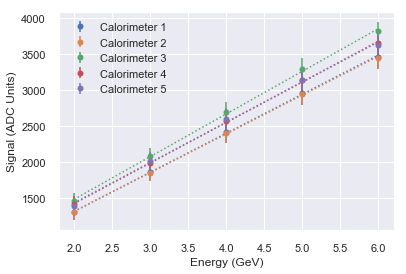

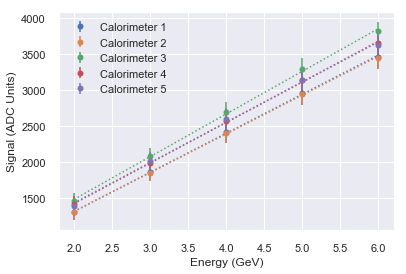

In [7]:
energy = np.array([2,3,4,5,6])
Calo_Vol = np.array([1300,1475,1215,1300,1435])
for i in [0,1,2,3,4]:
    mus, mus_err=[],[]
    for file_name in file_names[i::5]:
        mus.append(mu[file_name])
        mus_err.append(mu_err[file_name])
    
    plt.errorbar(energy,np.abs(mus) , yerr=mus_err, ls='none', label='Calorimeter {}'.format(i+1), fmt='o')

    popt, pcov = curve_fit(lin, energy,np.abs(mus))
    print('Calorimeter ',i+1, '@',Calo_Vol[i],'V')
    print('Slope = {}'.format(round(popt[0],1)))
    print('Offset = {}'.format(round(popt[1],1)))
    print('_______________')
    x = np.linspace(2,6, 10)
    plt.plot(x, lin(x,*popt), ls=':', c=colours[i])
    
    plt.legend(loc='best')
    plt.xlabel('Energy (GeV)')
    plt.ylabel('Signal (ADC Units)')
    